In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Iris.csv')
print(df.head())
print(df.columns)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [3]:
X = df.drop('Species', axis=1).values
y = df['Species'].values

In [4]:
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [7]:
k_values = list(range(1, 16))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


In [8]:
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best K: {best_k}")

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)


Best K: 1


KNeighborsClassifier(n_neighbors=1)

In [9]:
y_pred_final = knn_final.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



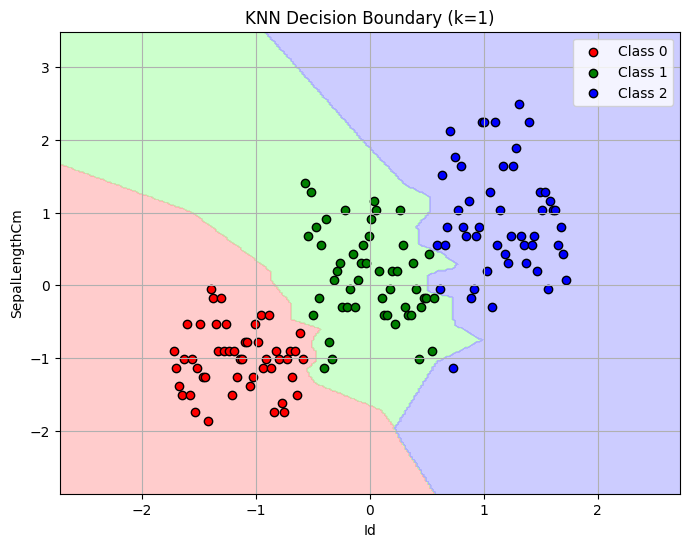

In [ ]:
def plot_decision_boundary(X, y, k=3, feature_indices=(0,1)):
    X_vis = X[:, feature_indices]
    y_vis = y

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_vis, y_vis)

    h = .02
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    for i, color in zip(np.unique(y_vis), cmap_bold):
        plt.scatter(X_vis[y_vis == i, 0], X_vis[y_vis == i, 1], c=color, label=f"Class {i}", edgecolor='k')

    plt.xlabel(df.columns[feature_indices[0]])
    plt.ylabel(df.columns[feature_indices[1]])
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_scaled, y, k=best_k, feature_indices=(0, 1))
